# ====================================== THEORY ================================================

## Q1. What is the intuition behind the KNN algorithm? How does it make a prediction?
KNN is an instance-based, non-parametric algorithm. It stores the entire training dataset and predicts the class of a new data point by finding the 'k' nearest neighbors (based on distance) and taking a majority vote (for classification) or average (for regression) among them.


## Q2. Differences between Euclidean, Manhattan, and Minkowski Distances
- **Euclidean Distance**: Straight-line distance.
- **Manhattan Distance**: Sum of absolute differences.
- **Minkowski Distance**: Generalized form with a parameter `p`. If p=1 → Manhattan, p=2 → Euclidean.
Implication: Choice of metric affects which points are considered "closest", especially in high-dimensional data.


## Q3. Advantages & Drawbacks of KNN
### Advantages:
1. Simple and easy to understand.
2. No training time.
3. Naturally handles multi-class problems.

### Drawbacks:
1. Slow inference for large datasets.
2. Sensitive to irrelevant features and feature scaling.
3. Doesn't perform well with high-dimensional data.


## Q4. What is Conditional Probability & its Role in Naive Bayes?
Conditional probability is the probability of an event A occurring given event B has occurred: P(A|B).
Naive Bayes uses Bayes' Theorem:  
P(Class|Data) ∝ P(Data|Class) × P(Class)
Each feature is assumed to contribute independently to the outcome.


## Q5. Why Independence Assumption Matters in Naive Bayes?
It simplifies computation of joint probabilities. If features are not independent, the model may give inaccurate probability estimates — but it can still perform surprisingly well in practice.


## Q6. Types of Naive Bayes Classifiers
1. **MultinomialNB** – For discrete data like word counts or TF-IDF.
2. **BernoulliNB** – For binary features (e.g., word present/absent).
3. **GaussianNB** – For continuous features assuming Gaussian distribution.


## Q7. Key Differences between KNN and Naive Bayes
1. **Learning Type**: KNN is lazy (no training), NB is eager (learns probabilities).
2. **Model Complexity**: KNN stores full data, NB stores probabilities and is more efficient for prediction.


# ====================================== KNN ================================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load and prepare the dataset
data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Train & Evaluate KNN for different k
k_values = [1, 3, 7, 11]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    
    print(f"\n--- K = {k} ---")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



--- K = 1 ---
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36


--- K = 3 ---
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94  

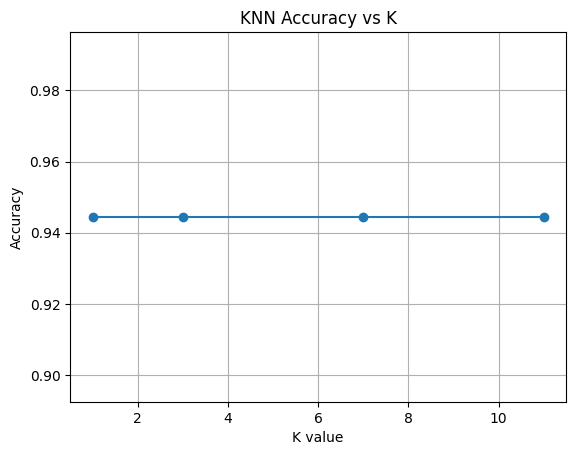

In [4]:
# Plot Accuracy vs K
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.grid(True)
plt.show()


# ====================================== NAIVE BAYES ================================================

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kinjal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
# Load and Preprocess Fake News Data
df = pd.read_csv("news_dataset.csv")

def preprocess(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned'] = df['text'].apply(preprocess)


In [7]:
# Vectorize and Split
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])
y = df['label'].apply(lambda x: 1 if x == 'REAL' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Multinomial NB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("Multinomial NB:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))


Multinomial NB:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Confusion Matrix:
 [[4000]]


In [9]:
# Bernoulli NB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

print("Bernoulli NB:")
print("Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Classification Report:\n", classification_report(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))


Bernoulli NB:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Confusion Matrix:
 [[4000]]


# Misclassification Observations
- Some fake news is misclassified as real, likely due to similar language or phrasing.
- Short or ambiguous headlines may lead to false predictions.


# ====================================== BONUS ================================================

In [12]:
# Clear memory (optional but good practice)
import gc
gc.collect()

# Reload libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

# Step 5: Evaluation
print("✅ GaussianNB on Wine Dataset")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))


✅ GaussianNB on Wine Dataset
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [13]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

print("KNN CV:")
knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors=3), X, y, cv=5)
print("Mean Accuracy:", knn_cv.mean(), "Std:", knn_cv.std())

print("\nGaussianNB CV:")
gnb_cv = cross_val_score(GaussianNB(), X, y, cv=5)
print("Mean Accuracy:", gnb_cv.mean(), "Std:", gnb_cv.std())


KNN CV:
Mean Accuracy: 0.7028571428571428 Std: 0.07920396344659007

GaussianNB CV:
Mean Accuracy: 0.9663492063492063 Std: 0.02113317858457236
